In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import explained_variance_score,r2_score, max_error, mean_absolute_error, median_absolute_error, mean_squared_error
from math import sqrt
from sklearn import linear_model , metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import joblib
%matplotlib inline

In [3]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf

In [4]:
init_notebook_mode(connected=True)
cf.go_offline()

In [5]:
df=pd.read_csv('DENATUREDETHYLALCOHOL.csv')

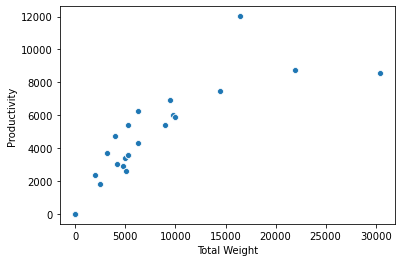

In [6]:
sns.scatterplot(x='Total Weight',y='Productivity',data=df)

In [7]:
df.describe()

,Unnamed: 0,VCN,TAT (ATB -ATUB)\nHOUR,TAT\n(ATA - ATD)\nHOUR,Total Weight,QTY IN LAKH MT,Qty in MMT,TEUs ('000),Port Delay (Hrs),Vessel Delay (Hrs),Productivity,DEAD WT
count,24.000000,24.000000,24.000000,24.000000,2.400000e+01,24.000000,24.000000,24.0,24.000000,24.000000,24.000000,22.000000
mean,369.625000,195830.333333,21.479167,29.758750,7.512747e+03,0.073750,0.007375,0.0,4.086667,3.120833,4525.740833,40079.736273
std,83.309696,4406.331094,23.714147,42.612358,7.169826e+03,0.071128,0.007113,0.0,15.461782,14.680155,2941.906079,3988.827304
min,174.000000,190910.000000,0.000000,0.000000,-9.094947e-13,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,26105.198000
25%,316.000000,191896.500000,0.000000,0.000000,3.788161e+03,0.037500,0.003750,0.0,0.000000,0.000000,2817.362500,39644.000000
50%,389.500000,192946.000000,21.950000,23.075000,5.245000e+03,0.050000,0.005000,0.0,0.000000,0.000000,4003.715000,41580.000000
75%,425.250000,200597.000000,36.250000,40.480000,9.550618e+03,0.092500,0.009250,0.0,0.000000,0.000000,6070.542500,41807.250000
max,495.000000,200792.000000,85.300000,167.620000,3.039361e+04,0.300000,0.030000,0.0,72.380000,72.000000,12021.790000,45680.000000


In [8]:
X=df[['Total Weight']]
y=df['Productivity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [9]:
lm=LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [10]:
print(lm.intercept_)

2008.07477460556


In [11]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Total Weight,0.324681


In [12]:
predictions = lm.predict(X_test)

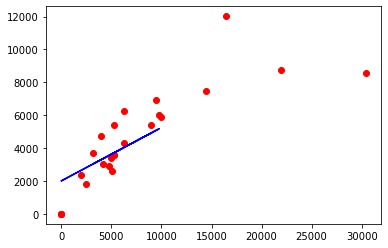

In [15]:
plt.scatter(X,y,color='red')
plt.plot(X_test,predictions,color='blue')

In [16]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))#Main
print('r2_score:',r2_score(y_test, predictions))

MAE: 1074.5812247049985
MSE: 1489701.8349642423
RMSE: 1220.5334223052814
r2_score: 0.6482386518201465


In [14]:
joblib.dump(lm,"Denatured_Ethyl_Alcohol..pkl")#only execute if rmse is less than half of mean of productivity

['Denatured_Ethyl_Alcohol..pkl']